In [294]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import csv
import json
import gmaps
import requests
from datetime import datetime
from config import gkey
import gmaps
from us import states
import censusgeocode

cleancities = "../Project1/cleaned_cities_states.csv"

In [204]:
gmaps.configure(api_key=gkey)

In [205]:
url = "https://jobs.github.com/positions.json?"
page = "page="
page_num = "0"
df_1 = []
df_2 = []
l = []
time = str(datetime.now())

In [206]:
csv = pd.read_csv('uscities_clean.csv')
c_df = pd.DataFrame(csv)

In [207]:
# API Calls

i = 1

while i < 20:
    
    f = (url + page + str(i))
    res = requests.get(f)
    res_json = res.json()
    res_vol = len(res_json)
    
    if (res_vol > 3):
        l = l + res_json
        print(f"Completed API call number {i}")
    else:
        print(f"res was smaller than 3 so we are going to stop the loop and print.")
        print(f"final length of response {len(l)}")
        break
    i += 1

print(type(l))

Completed API call number 1
Completed API call number 2
Completed API call number 3
Completed API call number 4
Completed API call number 5
Completed API call number 6
Completed API call number 7
res was smaller than 3 so we are going to stop the loop and print.
final length of response 307
<class 'list'>


In [295]:
# Drop columns in DF that are not needed

l = pd.DataFrame(l)

l2 = l.drop(columns=['url', 'company_url','how_to_apply', 'how_to_apply', 'company_logo'])

In [296]:
# Clean 'locations' column

l['location'] = l['location'].replace(
    {'New York, NY': 'New York, New York', 'New York': 'New York, New York', 
     'New York City': 'New York, New York', 'Frankfurt':'Frankfurt, Germany', 
     'Hamburg':'Hamburg, Germany','Barcelona':'Barcelona, Spain', 'Berlin':'Berlin, Germany', 
     'San Francisco': 'San Francisco, CA', 'London':'London, UK', 'Toronto':'Toronto, Canada', 
     'Chicago':'Chicago, IL', 'Den Haag':'Den Haag, Netherlands', 'Austin, Texas':'Austin, TX', 'München':'Munich, Berlin', 
     'Amsterdam':'Amsterdam, Netherlands', 'Eindhoven':'Eindhoven, Netherlands', 'Bremen':'Bremen, Germany', 
     'Munich':'Munich, Germany','Utrecht':'Utrecht, Netherlands','Oberkochen':'Oberkochen, Germany','Stuttgart':'Stuttgart, Germany',
    'Frankfurt  (Main)':'Frankfurt, Germany', 'Warsaw':'Warsaw, Poland', 'Lisbon':'Lisbon, Portugal', 'Nürnberg':'Nürnberg, Germany',
     'New York, New York 10001':'New York, NY', '81829 Munich':'Munich, Germany', 'Barendrecht': 'Barendrecht, Netherlands', 'Fort Collins':'Fort Collins, CO',
     'Buffalo':'Buffalo, NY', 'Los Angeles, CA, USA':'Los Angeles, CA','Portland, Maine':'Portland, ME','Philadelphia':'Philadelphia, PA',
     'Paris France':'Paris, France', 'Hamburg, Deutschland':'Hamburg, Germany', 'Rotterdam':'Rotterdam, Netherlands','Chicago, Illinois':'Chicago, IL', 
     'Budapest':'Budapest, Hungary', 'Bucharest':'Bucharest, Romania', 'San Francisco ':'San Francisco, CA','Remote Job':'Remote', 'Athens':'Athens, Greece',
     'Den Bosch':'Den Bosch, Netherlands','Remote - US':'Remote','Nijverdal':'Nijverdal, Netherlands', 'San Diego':'San Diego, CA','Mill Valley':'Mill Valley, CA',
     'Gothenburg':'Gothenburg, Sweden', 'Gothenburg ':'Gothenburg, Sweden','Redwood City, Ca':'Redwood City, CA', 'Oslo, Norway or Remote':'Remote','Lincoln, NE or Remote':'Remote','Helsinki/Remote':'Remote',
     'Paris - Remote (European Timezone)':'Remote','Miami, Fl or Remote':'Remote','Columbus, Ohio':'Columbus, OH', 'Oberkochen, Germany':'Oberkochen, Germany', 'Palo Alto':'Palo Alto, CA',
     'Cologne - Germany':'Cologne, Germany', 'Phoenix, Atlanta, Remote-US Based':'Remote'
    }) 

In [297]:
# Clean 'locations' column (continued)

clean_location = pd.read_csv(cleancities)
l2 = pd.merge(l, clean_location, on='id')
l2.drop(['company_logo', 'company_url', 'how_to_apply', 'location_x', 'url', 'location_y'], axis=1)
df2 = pd.DataFrame(l2)
l2

,company,company_logo,company_url,created_at,description,how_to_apply,id,location_x,title,type,url,city,state_code_or_country,location_y,Remote,City,County,State,Country
0,Datadog,https://jobs.github.com/rails/active_storage/b...,http:,Mon Oct 21 21:12:11 UTC 2019,<p>Have you been writing beautiful web UIs for...,"<p><a href=""https://grnh.se/f0a956961"">https:/...",b3704276-7ed7-4880-8d45-f35052964659,NewYork,Software Engineer- Frontend,Full Time,https://jobs.github.com/positions/b3704276-7ed...,NewYork,None,"New York, New York, United States",NaN,New York,New York,NY,United States
1,Abt Associates,https://jobs.github.com/rails/active_storage/b...,https://www.abtassociates.com/,Mon Oct 21 18:28:48 UTC 2019,<p><strong>Opportunity</strong></p>\n<p>Abt As...,"<p>Apply online here:\n<a href=""https://career...",a71fdb23-3447-4b5f-8fca-db08a774e48b,"Cambridge, MA",Senior Application Developer,Full Time,https://jobs.github.com/positions/a71fdb23-344...,Cambridge,MA,"Cambridge, MA, United States",NaN,Cambridge,Middlesex,MA,United States
2,Sertifi,None,https://corp.sertifi.com/,Mon Oct 21 18:25:41 UTC 2019,<p>Sertifi offers an Agreement Platform built ...,"<p><a href=""https://sertifi.applytojob.com/app...",df2d1d3f-4408-45ca-b586-3f07eb24e0e6,"Chicago, IL",Senior Software Developer,Full Time,https://jobs.github.com/positions/df2d1d3f-440...,Chicago,IL,"Chicago, IL, United States",NaN,Chicago,Cook,IL,United States
3,wrnch,https://jobs.github.com/rails/active_storage/b...,https://wrnch.ai/,Mon Oct 21 14:31:18 UTC 2019,<p>wrnch is one of Canada’s first profitable A...,<p>Please apply via our website -&gt; <a href=...,9dde244a-f5b9-458d-b99b-7cfa19cfa798,Montreal,Senior Software Developer,Full Time,https://jobs.github.com/positions/9dde244a-f5b...,Montreal,None,"Montreal, , Canada",NaN,Montreal,NaN,NaN,Canada
4,AJ Madison,https://jobs.github.com/rails/active_storage/b...,http://www.ajmadison.com/,Mon Oct 21 08:14:49 UTC 2019,<p><strong>Senior Full Stack Engineer</strong>...,<p><strong>Interested?</strong>\nYou can apply...,d81e897e-0bc7-4013-81b9-85c35cb96f57,"Brooklyn, United States",Senior Full Stack Engineer,Full Time,https://jobs.github.com/positions/d81e897e-0bc...,Brooklyn,United States,"Brooklyn, NY, United States",NaN,Brooklyn,Kings,NY,United States
5,Casechek,https://jobs.github.com/rails/active_storage/b...,https://www.casechek.com/,Fri Oct 18 19:00:54 UTC 2019,<p>COMPANY OVERVIEW</p>\n<p>Casechek is the in...,"<p>Email your resume to <a href=""mailto:career...",1e457e27-8d08-4205-bbc8-e5c4ef1f23f6,"Chicago, IL",Senior Software Engineer,Full Time,https://jobs.github.com/positions/1e457e27-8d0...,Chicago,IL,"Chicago, IL, United States",NaN,Chicago,Cook,IL,United States
6,BASF SE,https://jobs.github.com/rails/active_storage/b...,http://on.basf.com/BASFSE,Fri Oct 18 15:07:46 UTC 2019,<p><strong>Einsatzgebiet:</strong> IT / Inform...,"<p><a href=""https://basfse.redirect.your-jobre...",25f23b53-161e-4dcb-9c21-a0131784412d,Ludwigshafen,IT-Architekt_in in der Digitalisierung (m/w/d),Full Time,https://jobs.github.com/positions/25f23b53-161...,Ludwigshafen,None,"Ludwigshafen, , Germany",NaN,Ludwigshafen,NaN,NaN,Germany
7,BASF SE,https://jobs.github.com/rails/active_storage/b...,http://on.basf.com/meinekarriere,Fri Oct 18 13:59:49 UTC 2019,<p><strong>Einsatzgebiet:</strong> IT / Inform...,"<p><a href=""https://basfse.redirect.your-jobre...",db868fae-b183-4585-ba44-edd0f8d5ef20,Ludwigshafen,Softwareentwickler_in in der Digitalisierung (...,Full Time,https://jobs.github.com/positions/db868fae-b18...,Ludwigshafen,None,"Ludwigshafen, , Germany",NaN,Ludwigshafen,NaN,NaN,Germany
8,"Kognition, LLC",https://jobs.github.com/rails/active_storage/b...,https://www.kognition.ai,Fri Oct 18 12:10:31 UTC 2019,<p><strong>Position Summary:</strong></p>\n<p>...,"<p>Email your resume to <a href=""mailto:jobs@k...",d4383e28-fc94-4121-9140-60b47c6b3437,"Philadelphia, PA",Senior UI Engineer,Full Time,https://jobs.github.com/positions/d4383e28-fc9...,Philadel

In [298]:
# Split location column into city and state/country columns

new = l["location"].str.split(",", n = 1, expand = True)
l["city"]=new[0]
l["state_code_or_country"]=new[1]
l

,company,company_logo,company_url,created_at,description,how_to_apply,id,location,title,type,url,city,state_code_or_country
0,YouVersion,https://jobs.github.com/rails/active_storage/b...,http://youversion.com/careers,Wed Oct 23 20:21:54 UTC 2019,<p>The YouVersion Software Engineer will help ...,"<p>Ready to apply? Visit <a href=""http://bit.l...",c3160e50-d094-434b-b884-2c27c91df656,"Oklahoma City, OK",YouVersion Software Engineer,Full Time,https://jobs.github.com/positions/c3160e50-d09...,Oklahoma City,OK
1,YouVersion,https://jobs.github.com/rails/active_storage/b...,http://youversion.com/careers,Wed Oct 23 18:06:30 UTC 2019,<p>The YouVersion Mobile Engineer will help pe...,"<p>Ready to apply? Visit <a href=""http://bit.l...",e498085b-f981-4bb5-a1eb-3301d0f81ff1,"Oklahoma City, OK",YouVersion Mobile Engineer - Android,Full Time,https://jobs.github.com/positions/e498085b-f98...,Oklahoma City,OK
2,GetUpside,https://jobs.github.com/rails/active_storage/b...,https://www.getupside.com/,Wed Oct 23 19:05:05 UTC 2019,<p>Meet GetUpside</p>\n<p>GetUpside helps busi...,<p>Please apply directly via this job link: <a...,88aea7d8-c315-4313-823a-1f14feab33c9,"Washington, DC",Senior Software Engineer,Full Time,https://jobs.github.com/positions/88aea7d8-c31...,Washington,DC
3,YouVersion,https://jobs.github.com/rails/active_storage/b...,http://youversion.com/careers,Wed Oct 23 16:36:13 UTC 2019,<p>The Full-Stack Software Engineer will be re...,"<p>Ready to apply?\nVisit <a href=""http://bit....",a96b9c4d-5fca-4ecc-83f2-88d7558a4162,"Oklahoma City, OK",YouVersion Full-Stack Software Engineer,Full Time,https://jobs.github.com/positions/a96b9c4d-5fc...,Oklahoma City,OK
4,hte – the high throughput experimentation company,https://jobs.github.com/rails/active_storage/b...,http://www.hte-company.com,Wed Oct 23 15:10:00 UTC 2019,<p>Zur Verstärkung unseres Teams suchen wir ei...,"<p><a href=""https://htekarriere.redirect.your-...",b7d3856c-3ec3-4566-90a4-19ec369a9f7b,Heidelberg,Senior Softwareentwickler .NET/C# (m/w/d) im B...,Full Time,https://jobs.github.com/positions/b7d3856c-3ec...,Heidelberg,None
5,Reaktor,https://jobs.github.com/rails/active_storage/b...,https://reaktor.com/careers/,Wed Oct 23 14:59:13 UTC 2019,<p>We at Reaktor are known for changing how th...,"<p>So, <a href=""https://www.reaktor.com/blog/a...",0276f45a-0355-4d81-84b8-fe498cc5377f,"Lisbon, Portugal",Fearless Team Builder and Software Developer,Full Time,https://jobs.github.com/positions/0276f45a-035...,Lisbon,Portugal
6,Reaktor,https://jobs.github.com/rails/active_storage/b...,https://reaktor.com/careers/,Wed Oct 23 14:49:07 UTC 2019,<p>Curious about applying your tech skills in ...,"<p>So, <a href=""https://www.reaktor.com/blog/a...",dbc59368-523c-455c-ab85-8f4e634e5dc1,"Lisbon, Portugal",Software Engineer With a Twist,Full Time,https://jobs.github.com/positions/dbc59368-523...,Lisbon,Portugal
7,INFICON,None,http:,Wed Oct 23 14:37:43 UTC 2019,"<p>COMPANY OVERVIEW:\nINFICON is a growing, gl...","<p>Apply Here: <a href=""http://www.Click2Apply...",343a5271-90fb-44fa-badc-8f1eca1ba30f,"East Syracuse, NY",Senior Software Engineer,Full Time,https://jobs.github.com/positions/343a5271-90f...,East Syracuse,NY
8,Intact Financial Corporation,https://jobs.github.com/rails/active_storage/b...,https://careers.intact.ca/ca/en,Wed Oct 23 14:31:28 UTC 2019,<p>#IntactCareers</p>\n<p>How do you imagine l...,"<p>Click on the link to apply: <a href=""https:...",19707fb9-1490-4829-9eb7-d3b657c4dd7b,Montreal,DevOps Artificial Intelligence,Full Time,https://jobs.github.com/positions/19707fb9-149...,Montreal,None
9,Intact Financial Corporation,https://jobs.github.com/rails/active_storage/b...,https://careers.intact.ca/ca/en,Wed Oct 23 14:27:57 UTC 2019,<p>#IntactCareers</p>\n<p>How do you picture a...,"<p>Click on the link to apply: <a href=""https:...",85a58dfc-7d81-4c6b-9609-0cb560a4ed16,Montreal,"Manager, Software Engineering in AI",Full Time,https://jobs.github.com/positions/85a58dfc-7d8...,Montre

In [299]:
l.to_csv('aftersplit.csv')

In [300]:
s = l.merge(c_df, how="left", on="city")
c = pd.DataFrame(s).groupby(by="city").count() #[['lat'],['lng']]

In [301]:
clean_locations = [x for x in locations if x != 'NaN']
dl = clean_location.apply (pd.to_numeric, errors='coerce')
dl = dl.dropna()
dl

,id,location,Remote,City,County,State,Country


In [302]:
sc = s.drop(columns=['company', 'company_logo', 'location', 'company_url', 'created_at','description', 'how_to_apply','id_x','title','type','url','state_id','state_name','county_name','zips','id_y'])
dsc = sc.apply (pd.to_numeric, errors='coerce')
dsc = sc.dropna()

In [303]:
l = l[~l['location'].str.contains('Berlin',na=False)] #na=False
l = l[~l['location'].str.contains('Athens',na=False)] #na=False
l = l[~l['location'].str.contains('London',na=False)] #na=False
l = l[~l['location'].str.contains('Hamburg',na=False)] #na=False
l = l[~l['location'].str.contains('Munich',na=False)] #na=False

l

,company,company_logo,company_url,created_at,description,how_to_apply,id,location,title,type,url,city,state_code_or_country
0,YouVersion,https://jobs.github.com/rails/active_storage/b...,http://youversion.com/careers,Wed Oct 23 20:21:54 UTC 2019,<p>The YouVersion Software Engineer will help ...,"<p>Ready to apply? Visit <a href=""http://bit.l...",c3160e50-d094-434b-b884-2c27c91df656,"Oklahoma City, OK",YouVersion Software Engineer,Full Time,https://jobs.github.com/positions/c3160e50-d09...,Oklahoma City,OK
1,YouVersion,https://jobs.github.com/rails/active_storage/b...,http://youversion.com/careers,Wed Oct 23 18:06:30 UTC 2019,<p>The YouVersion Mobile Engineer will help pe...,"<p>Ready to apply? Visit <a href=""http://bit.l...",e498085b-f981-4bb5-a1eb-3301d0f81ff1,"Oklahoma City, OK",YouVersion Mobile Engineer - Android,Full Time,https://jobs.github.com/positions/e498085b-f98...,Oklahoma City,OK
2,GetUpside,https://jobs.github.com/rails/active_storage/b...,https://www.getupside.com/,Wed Oct 23 19:05:05 UTC 2019,<p>Meet GetUpside</p>\n<p>GetUpside helps busi...,<p>Please apply directly via this job link: <a...,88aea7d8-c315-4313-823a-1f14feab33c9,"Washington, DC",Senior Software Engineer,Full Time,https://jobs.github.com/positions/88aea7d8-c31...,Washington,DC
3,YouVersion,https://jobs.github.com/rails/active_storage/b...,http://youversion.com/careers,Wed Oct 23 16:36:13 UTC 2019,<p>The Full-Stack Software Engineer will be re...,"<p>Ready to apply?\nVisit <a href=""http://bit....",a96b9c4d-5fca-4ecc-83f2-88d7558a4162,"Oklahoma City, OK",YouVersion Full-Stack Software Engineer,Full Time,https://jobs.github.com/positions/a96b9c4d-5fc...,Oklahoma City,OK
4,hte – the high throughput experimentation company,https://jobs.github.com/rails/active_storage/b...,http://www.hte-company.com,Wed Oct 23 15:10:00 UTC 2019,<p>Zur Verstärkung unseres Teams suchen wir ei...,"<p><a href=""https://htekarriere.redirect.your-...",b7d3856c-3ec3-4566-90a4-19ec369a9f7b,Heidelberg,Senior Softwareentwickler .NET/C# (m/w/d) im B...,Full Time,https://jobs.github.com/positions/b7d3856c-3ec...,Heidelberg,None
5,Reaktor,https://jobs.github.com/rails/active_storage/b...,https://reaktor.com/careers/,Wed Oct 23 14:59:13 UTC 2019,<p>We at Reaktor are known for changing how th...,"<p>So, <a href=""https://www.reaktor.com/blog/a...",0276f45a-0355-4d81-84b8-fe498cc5377f,"Lisbon, Portugal",Fearless Team Builder and Software Developer,Full Time,https://jobs.github.com/positions/0276f45a-035...,Lisbon,Portugal
6,Reaktor,https://jobs.github.com/rails/active_storage/b...,https://reaktor.com/careers/,Wed Oct 23 14:49:07 UTC 2019,<p>Curious about applying your tech skills in ...,"<p>So, <a href=""https://www.reaktor.com/blog/a...",dbc59368-523c-455c-ab85-8f4e634e5dc1,"Lisbon, Portugal",Software Engineer With a Twist,Full Time,https://jobs.github.com/positions/dbc59368-523...,Lisbon,Portugal
7,INFICON,None,http:,Wed Oct 23 14:37:43 UTC 2019,"<p>COMPANY OVERVIEW:\nINFICON is a growing, gl...","<p>Apply Here: <a href=""http://www.Click2Apply...",343a5271-90fb-44fa-badc-8f1eca1ba30f,"East Syracuse, NY",Senior Software Engineer,Full Time,https://jobs.github.com/positions/343a5271-90f...,East Syracuse,NY
8,Intact Financial Corporation,https://jobs.github.com/rails/active_storage/b...,https://careers.intact.ca/ca/en,Wed Oct 23 14:31:28 UTC 2019,<p>#IntactCareers</p>\n<p>How do you imagine l...,"<p>Click on the link to apply: <a href=""https:...",19707fb9-1490-4829-9eb7-d3b657c4dd7b,Montreal,DevOps Artificial Intelligence,Full Time,https://jobs.github.com/positions/19707fb9-149...,Montreal,None
9,Intact Financial Corporation,https://jobs.github.com/rails/active_storage/b...,https://careers.intact.ca/ca/en,Wed Oct 23 14:27:57 UTC 2019,<p>#IntactCareers</p>\n<p>How do you picture a...,"<p>Click on the link to apply: <a href=""https:...",85a58dfc-7d81-4c6b-9609-0cb560a4ed16,Montreal,"Manager, Software Engineering in AI",Full Time,https://jobs.github.com/positions/85a58dfc-7d8...,Montre

In [304]:
l.to_csv('export_before_merge3.csv')

In [305]:
# Pull in latitude and longitute

s = l.merge(c_df, how="left", on="city")
c = pd.DataFrame(s).groupby(by="city").count() #[['lat'],['lng']]

In [306]:
locations = s[["lat", "lng","city"]]

In [307]:
sc = s.drop(columns=['company', 'company_logo', 'location', 'company_url', 'created_at','description', 'how_to_apply','id_x','title','type','url','state_id','state_name','county_name','zips','id_y'])
dsc = sc.apply (pd.to_numeric, errors='coerce')
dsc = sc.dropna()
dsc.to_csv('after_merge.csv')
sc

,city,state_code_or_country,lat,lng
0,Oklahoma City,OK,35.4676,-97.5137
1,Oklahoma City,OK,35.4676,-97.5137
2,Washington,DC,38.9047,-77.0163
3,Washington,DC,39.2422,-81.6679
4,Washington,DC,40.7587,-74.9825
5,Washington,DC,30.6150,-92.0595
6,Washington,DC,35.5587,-77.0546
7,Washington,DC,41.3976,-96.2074
8,Washington,DC,40.1739,-80.2465
9,Washington,DC,38.7122,-78.1598


In [308]:
clean_locations = [x for x in locations if x != 'NaN']
dl = locations.apply (pd.to_numeric, errors='coerce')
dl = dl.dropna()
dl

,lat,lng,city


In [340]:
s.groupby(by="city").count()

,company,company_logo,company_url,created_at,description,how_to_apply,id_x,location,title,type,url,state_code_or_country,state_id,state_name,county_name,lat,lng,zips,id_y
city,,,,,,,,,,,,,,,,,,,
Affing (bei Augsburg),1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
Aliso Viejo,5,0,2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Amsterdam,16,16,12,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Atlanta,9,9,9,9,9,9,9,9,9,9,9,0,9,9,9,9,9,9,9
Austin,48,42,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
Australia and/or Remote,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
Bali,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
Baltimore,2,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Barcelona,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0


In [341]:
dsc

,city,state_code_or_country,lat,lng
0,Oklahoma City,OK,35.4676,-97.5137
1,Oklahoma City,OK,35.4676,-97.5137
2,Washington,DC,38.9047,-77.0163
3,Washington,DC,39.2422,-81.6679
4,Washington,DC,40.7587,-74.9825
5,Washington,DC,30.6150,-92.0595
6,Washington,DC,35.5587,-77.0546
7,Washington,DC,41.3976,-96.2074
8,Washington,DC,40.1739,-80.2465
9,Washington,DC,38.7122,-78.1598


In [342]:
dsc1 = dsc.drop(columns='city')
final_coordinates = dsc1.drop(columns='state_code_or_country')

In [343]:
final_coordinates

,lat,lng
0,35.4676,-97.5137
1,35.4676,-97.5137
2,38.9047,-77.0163
3,39.2422,-81.6679
4,40.7587,-74.9825
5,30.6150,-92.0595
6,35.5587,-77.0546
7,41.3976,-96.2074
8,40.1739,-80.2465
9,38.7122,-78.1598


In [344]:
# Create heat map

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(final_coordinates, weights=location_count, 
    dissipating=False, max_intensity=10,
    point_radius = 1)

fig.add_layer(heat_layer)

plt.savefig("Heatmap4.png")

fig

NameError: name 'location_count' is not defined

In [345]:
plt.savefig("Heatmap2.png")

<Figure size 432x288 with 0 Axes>

In [346]:
# Clean and group job title

job_ct = l2['title'].count()

job_ct

243

In [347]:
eng = len(l2[l2['title'].str.contains('Eng')])
dvlpr = len(l2[l2['title'].str.contains('Dev')])
anlyst = len(l2[l2['title'].str.contains('Analyst')])
science = len(l2[l2['title'].str.contains('Scientist')])
senior = len(l2[l2['title'].str.contains('Sr')])
lead = len(l2[l2['title'].str.contains('Lead')])
remote = len(l2[l2['description'].str.contains('Remote')])
staff = len(l2[l2['title'].str.contains('Staff')])
principal = len(l2[l2['title'].str.contains('Principal')])

In [348]:
l2.insert(5, 'Title Bucket', 'Other')

jobs =[]

for job in l2.iterrows():
    if 'Analyst' in job[1]['title']:
        job[1]['Title Bucket'] = 'Analyst'
    elif 'ANALYST' in job[1]['title']:
        job[1]['Title Bucket'] = 'Analyst'
    elif 'analyst' in job[1]['title']:
        job[1]['Title Bucket'] = 'Analyst'
    elif 'Scientist' in job[1]['title']:
        job[1]['Title Bucket'] = 'Scientist'
    elif 'scientist' in job[1]['title']:
        job[1]['Title Bucket'] = 'Scientist'
    elif 'SCIENTIST' in job[1]['title']:
        job[1]['Title Bucket'] = 'Scientist'
    elif 'Dev' in job[1]['title']:
        job[1]['Title Bucket'] = 'Developer'
    elif 'dev' in job[1]['title']:
        job[1]['Title Bucket'] = 'Developer'
    elif 'DEV' in job[1]['title']:
        job[1]['Title Bucket'] = 'Developer'
    elif 'Eng' in job[1]['title']:
        job[1]['Title Bucket'] = 'Engineer'
    elif 'eng' in job[1]['title']:
        job[1]['Title Bucket'] = 'Engineer'
    elif 'ENG' in job[1]['title']:
        job[1]['Title Bucket'] = 'Engineer'
    elif 'Staff' in job[1]['title']:
        job[1]['Title Bucket'] = 'Staff'
    elif 'Principal' in job[1]['title']:
        job[1]['Title Bucket'] = 'Principal'
        
l2.head()

,company,company_logo,company_url,created_at,description,Title Bucket,how_to_apply,id,location_x,title,type,url,city,state_code_or_country,location_y,Remote,City,County,State,Country
0,Datadog,https://jobs.github.com/rails/active_storage/b...,http:,Mon Oct 21 21:12:11 UTC 2019,<p>Have you been writing beautiful web UIs for...,Engineer,"<p><a href=""https://grnh.se/f0a956961"">https:/...",b3704276-7ed7-4880-8d45-f35052964659,NewYork,Software Engineer- Frontend,Full Time,https://jobs.github.com/positions/b3704276-7ed...,NewYork,None,"New York, New York, United States",NaN,New York,New York,NY,United States
1,Abt Associates,https://jobs.github.com/rails/active_storage/b...,https://www.abtassociates.com/,Mon Oct 21 18:28:48 UTC 2019,<p><strong>Opportunity</strong></p>\n<p>Abt As...,Developer,"<p>Apply online here:\n<a href=""https://career...",a71fdb23-3447-4b5f-8fca-db08a774e48b,"Cambridge, MA",Senior Application Developer,Full Time,https://jobs.github.com/positions/a71fdb23-344...,Cambridge,MA,"Cambridge, MA, United States",NaN,Cambridge,Middlesex,MA,United States
2,Sertifi,None,https://corp.sertifi.com/,Mon Oct 21 18:25:41 UTC 2019,<p>Sertifi offers an Agreement Platform built ...,Developer,"<p><a href=""https://sertifi.applytojob.com/app...",df2d1d3f-4408-45ca-b586-3f07eb24e0e6,"Chicago, IL",Senior Software Developer,Full Time,https://jobs.github.com/positions/df2d1d3f-440...,Chicago,IL,"Chicago, IL, United States",NaN,Chicago,Cook,IL,United States
3,wrnch,https://jobs.github.com/rails/active_storage/b...,https://wrnch.ai/,Mon Oct 21 14:31:18 UTC 2019,<p>wrnch is one of Canada’s first profitable A...,Developer,<p>Please apply via our website -&gt; <a href=...,9dde244a-f5b9-458d-b99b-7cfa19cfa798,Montreal,Senior Software Developer,Full Time,https://jobs.github.com/positions/9dde244a-f5b...,Montreal,None,"Montreal, , Canada",NaN,Montreal,NaN,NaN,Canada
4,AJ Madison,https://jobs.github.com/rails/active_storage/b...,http://www.ajmadison.com/,Mon Oct 21 08:14:49 UTC 2019,<p><strong>Senior Full Stack Engineer</strong>...,Engineer,<p><strong>Interested?</strong>\nYou can apply...,d81e897e-0bc7-4013-81b9-85c35cb96f57,"Brooklyn, United States",Senior Full Stack Engineer,Full Time,https://jobs.github.com/positions/d81e897e-0bc...,Brooklyn,United States,"Brooklyn, NY, United States",NaN,Brooklyn,Kings,NY,United States


In [349]:
l2.insert(6, 'Senior Bucket', 'Other')

for z in l2.iterrows():
    if 'Lead' in z[1]['title']:
        z[1]['Senior Bucket'] = 'Lead'
    elif 'lead' in z[1]['title']:
        z[1]['Senior Bucket'] = 'Lead'
    elif 'LEAD' in z[1]['title']:
        z[1]['Senior Bucket'] = 'Lead'
    elif 'Senior' in z[1]['title']:
        z[1]['Senior Bucket'] = 'Senior'
    elif 'SENIOR' in z[1]['title']:
        z[1]['Senior Bucket'] = 'Senior'
    elif 'senior' in z[1]['title']:
        z[1]['Senior Bucket'] = 'Senior'
    elif 'Sr' in z[1]['title']:
        z[1]['Senior Bucket'] = 'Senior'
    
l2

,company,company_logo,company_url,created_at,description,Title Bucket,Senior Bucket,how_to_apply,id,location_x,...,type,url,city,state_code_or_country,location_y,Remote,City,County,State,Country
0,Datadog,https://jobs.github.com/rails/active_storage/b...,http:,Mon Oct 21 21:12:11 UTC 2019,<p>Have you been writing beautiful web UIs for...,Engineer,Other,"<p><a href=""https://grnh.se/f0a956961"">https:/...",b3704276-7ed7-4880-8d45-f35052964659,NewYork,...,Full Time,https://jobs.github.com/positions/b3704276-7ed...,NewYork,None,"New York, New York, United States",NaN,New York,New York,NY,United States
1,Abt Associates,https://jobs.github.com/rails/active_storage/b...,https://www.abtassociates.com/,Mon Oct 21 18:28:48 UTC 2019,<p><strong>Opportunity</strong></p>\n<p>Abt As...,Developer,Senior,"<p>Apply online here:\n<a href=""https://career...",a71fdb23-3447-4b5f-8fca-db08a774e48b,"Cambridge, MA",...,Full Time,https://jobs.github.com/positions/a71fdb23-344...,Cambridge,MA,"Cambridge, MA, United States",NaN,Cambridge,Middlesex,MA,United States
2,Sertifi,None,https://corp.sertifi.com/,Mon Oct 21 18:25:41 UTC 2019,<p>Sertifi offers an Agreement Platform built ...,Developer,Senior,"<p><a href=""https://sertifi.applytojob.com/app...",df2d1d3f-4408-45ca-b586-3f07eb24e0e6,"Chicago, IL",...,Full Time,https://jobs.github.com/positions/df2d1d3f-440...,Chicago,IL,"Chicago, IL, United States",NaN,Chicago,Cook,IL,United States
3,wrnch,https://jobs.github.com/rails/active_storage/b...,https://wrnch.ai/,Mon Oct 21 14:31:18 UTC 2019,<p>wrnch is one of Canada’s first profitable A...,Developer,Senior,<p>Please apply via our website -&gt; <a href=...,9dde244a-f5b9-458d-b99b-7cfa19cfa798,Montreal,...,Full Time,https://jobs.github.com/positions/9dde244a-f5b...,Montreal,None,"Montreal, , Canada",NaN,Montreal,NaN,NaN,Canada
4,AJ Madison,https://jobs.github.com/rails/active_storage/b...,http://www.ajmadison.com/,Mon Oct 21 08:14:49 UTC 2019,<p><strong>Senior Full Stack Engineer</strong>...,Engineer,Senior,<p><strong>Interested?</strong>\nYou can apply...,d81e897e-0bc7-4013-81b9-85c35cb96f57,"Brooklyn, United States",...,Full Time,https://jobs.github.com/positions/d81e897e-0bc...,Brooklyn,United States,"Brooklyn, NY, United States",NaN,Brooklyn,Kings,NY,United States
5,Casechek,https://jobs.github.com/rails/active_storage/b...,https://www.casechek.com/,Fri Oct 18 19:00:54 UTC 2019,<p>COMPANY OVERVIEW</p>\n<p>Casechek is the in...,Engineer,Senior,"<p>Email your resume to <a href=""mailto:career...",1e457e27-8d08-4205-bbc8-e5c4ef1f23f6,"Chicago, IL",...,Full Time,https://jobs.github.com/positions/1e457e27-8d0...,Chicago,IL,"Chicago, IL, United States",NaN,Chicago,Cook,IL,United States
6,BASF SE,https://jobs.github.com/rails/active_storage/b...,http://on.basf.com/BASFSE,Fri Oct 18 15:07:46 UTC 2019,<p><strong>Einsatzgebiet:</strong> IT / Inform...,Other,Other,"<p><a href=""https://basfse.redirect.your-jobre...",25f23b53-161e-4dcb-9c21-a0131784412d,Ludwigshafen,...,Full Time,https://jobs.github.com/positions/25f23b53-161...,Ludwigshafen,None,"Ludwigshafen, , Germany",NaN,Ludwigshafen,NaN,NaN,Germany
7,BASF SE,https://jobs.github.com/rails/active_storage/b...,http://on.basf.com/meinekarriere,Fri Oct 18 13:59:49 UTC 2019,<p><strong>Einsatzgebiet:</strong> IT / Inform...,Other,Other,"<p><a href=""https://basfse.redirect.your-jobre...",db868fae-b183-4585-ba44-edd0f8d5ef20,Ludwigshafen,...,Full Time,https://jobs.github.com/positions/db868fae-b18...,Ludwigshafen,None,"Ludwigshafen, , Germany",NaN,Ludwigshafen,NaN,NaN,Germany
8,"Kognition, LLC",https://jobs.github.com/rails/active_storage/b...,https://www.kognition.ai,Fri Oct 18 12:10:31 UTC 2019,<p><strong>Position Summary:</strong></p>\n<p>...,Engineer,Senior,"<p>Email your resume to <a href=""mailto:jobs@k...",d4383e28-fc94-4121-9140-60b47c6b3437,"Philadelphia, PA",...,Full Time,https://jobs.github.com/positions/d4383e28-fc9...,Philadelphia,PA,"Philadelphia, PA",NaN,Philadelphia,Philadelphia,PA,United States
9,"K

In [350]:
l2.insert(6, 'Remote?', 'Onsite')

for a in l2.iterrows():
    if 'Remote' in a[1]['location_x'] or 'Remote' in a[1]['title']:
        a[1]['Remote?'] = 'Remote'
    elif 'Remote' in a[1]['location_x'] or 'Remote' in a[1]['title']:
        a[1['Remote?']] = 'Remote'
    elif 'Remote' in a[1]['location_x'] or 'Remote' in a[1]['title']:
        a[1]['Remote?'] = 'Remote'
        
l2

,company,company_logo,company_url,created_at,description,Title Bucket,Remote?,Senior Bucket,how_to_apply,id,...,type,url,city,state_code_or_country,location_y,Remote,City,County,State,Country
0,Datadog,https://jobs.github.com/rails/active_storage/b...,http:,Mon Oct 21 21:12:11 UTC 2019,<p>Have you been writing beautiful web UIs for...,Engineer,Onsite,Other,"<p><a href=""https://grnh.se/f0a956961"">https:/...",b3704276-7ed7-4880-8d45-f35052964659,...,Full Time,https://jobs.github.com/positions/b3704276-7ed...,NewYork,None,"New York, New York, United States",NaN,New York,New York,NY,United States
1,Abt Associates,https://jobs.github.com/rails/active_storage/b...,https://www.abtassociates.com/,Mon Oct 21 18:28:48 UTC 2019,<p><strong>Opportunity</strong></p>\n<p>Abt As...,Developer,Onsite,Senior,"<p>Apply online here:\n<a href=""https://career...",a71fdb23-3447-4b5f-8fca-db08a774e48b,...,Full Time,https://jobs.github.com/positions/a71fdb23-344...,Cambridge,MA,"Cambridge, MA, United States",NaN,Cambridge,Middlesex,MA,United States
2,Sertifi,None,https://corp.sertifi.com/,Mon Oct 21 18:25:41 UTC 2019,<p>Sertifi offers an Agreement Platform built ...,Developer,Onsite,Senior,"<p><a href=""https://sertifi.applytojob.com/app...",df2d1d3f-4408-45ca-b586-3f07eb24e0e6,...,Full Time,https://jobs.github.com/positions/df2d1d3f-440...,Chicago,IL,"Chicago, IL, United States",NaN,Chicago,Cook,IL,United States
3,wrnch,https://jobs.github.com/rails/active_storage/b...,https://wrnch.ai/,Mon Oct 21 14:31:18 UTC 2019,<p>wrnch is one of Canada’s first profitable A...,Developer,Onsite,Senior,<p>Please apply via our website -&gt; <a href=...,9dde244a-f5b9-458d-b99b-7cfa19cfa798,...,Full Time,https://jobs.github.com/positions/9dde244a-f5b...,Montreal,None,"Montreal, , Canada",NaN,Montreal,NaN,NaN,Canada
4,AJ Madison,https://jobs.github.com/rails/active_storage/b...,http://www.ajmadison.com/,Mon Oct 21 08:14:49 UTC 2019,<p><strong>Senior Full Stack Engineer</strong>...,Engineer,Onsite,Senior,<p><strong>Interested?</strong>\nYou can apply...,d81e897e-0bc7-4013-81b9-85c35cb96f57,...,Full Time,https://jobs.github.com/positions/d81e897e-0bc...,Brooklyn,United States,"Brooklyn, NY, United States",NaN,Brooklyn,Kings,NY,United States
5,Casechek,https://jobs.github.com/rails/active_storage/b...,https://www.casechek.com/,Fri Oct 18 19:00:54 UTC 2019,<p>COMPANY OVERVIEW</p>\n<p>Casechek is the in...,Engineer,Onsite,Senior,"<p>Email your resume to <a href=""mailto:career...",1e457e27-8d08-4205-bbc8-e5c4ef1f23f6,...,Full Time,https://jobs.github.com/positions/1e457e27-8d0...,Chicago,IL,"Chicago, IL, United States",NaN,Chicago,Cook,IL,United States
6,BASF SE,https://jobs.github.com/rails/active_storage/b...,http://on.basf.com/BASFSE,Fri Oct 18 15:07:46 UTC 2019,<p><strong>Einsatzgebiet:</strong> IT / Inform...,Other,Onsite,Other,"<p><a href=""https://basfse.redirect.your-jobre...",25f23b53-161e-4dcb-9c21-a0131784412d,...,Full Time,https://jobs.github.com/positions/25f23b53-161...,Ludwigshafen,None,"Ludwigshafen, , Germany",NaN,Ludwigshafen,NaN,NaN,Germany
7,BASF SE,https://jobs.github.com/rails/active_storage/b...,http://on.basf.com/meinekarriere,Fri Oct 18 13:59:49 UTC 2019,<p><strong>Einsatzgebiet:</strong> IT / Inform...,Other,Onsite,Other,"<p><a href=""https://basfse.redirect.your-jobre...",db868fae-b183-4585-ba44-edd0f8d5ef20,...,Full Time,https://jobs.github.com/positions/db868fae-b18...,Ludwigshafen,None,"Ludwigshafen, , Germany",NaN,Ludwigshafen,NaN,NaN,Germany
8,"Kognition, LLC",https://jobs.github.com/rails/active_storage/b...,https://www.kognition.ai,Fri Oct 18 12:10:31 UTC 2019,<p><strong>Position Summary:</strong></p>\n<p>...,Engineer,Onsite,Senior,"<p>Email your resume to <a href=""mailto:jobs@k...",d4383e28-fc94-4121-9140-60b47c6b3437,...,Full Time,https://jobs.github.com/positions/d4383e28-fc9...,Philadelphia,PA,"Philadelphia, PA",NaN,Philadelphia,Philadelphia,PA,United States
9,"Kognition, LLC",https://jobs.github.com/rails/active_storage/b...,https:/

In [351]:
l2.insert(7, 'Degree Indication', 'None Listed')

for c in l2.iterrows():
    if 'Master' in c[1]['description']:
        c[1]['Degree Indication'] = 'Master'
    elif 'master' in c[1]['description']:
        c[1]['Degree Indication'] = 'Master'
    elif 'Bachelor' in c[1]['description']:
        c[1]['Degree Indication'] = 'Bachelor'
    elif 'bachelor' in c[1]['description']:
        c[1]['Degree Indication'] = 'Bachelor'
    elif 'camp' in c[1]['description']:
        c[1]['Degree Indication'] = 'Bootcamp'
l2

,company,company_logo,company_url,created_at,description,Title Bucket,Remote?,Degree Indication,Senior Bucket,how_to_apply,...,type,url,city,state_code_or_country,location_y,Remote,City,County,State,Country
0,Datadog,https://jobs.github.com/rails/active_storage/b...,http:,Mon Oct 21 21:12:11 UTC 2019,<p>Have you been writing beautiful web UIs for...,Engineer,Onsite,Master,Other,"<p><a href=""https://grnh.se/f0a956961"">https:/...",...,Full Time,https://jobs.github.com/positions/b3704276-7ed...,NewYork,None,"New York, New York, United States",NaN,New York,New York,NY,United States
1,Abt Associates,https://jobs.github.com/rails/active_storage/b...,https://www.abtassociates.com/,Mon Oct 21 18:28:48 UTC 2019,<p><strong>Opportunity</strong></p>\n<p>Abt As...,Developer,Onsite,None Listed,Senior,"<p>Apply online here:\n<a href=""https://career...",...,Full Time,https://jobs.github.com/positions/a71fdb23-344...,Cambridge,MA,"Cambridge, MA, United States",NaN,Cambridge,Middlesex,MA,United States
2,Sertifi,None,https://corp.sertifi.com/,Mon Oct 21 18:25:41 UTC 2019,<p>Sertifi offers an Agreement Platform built ...,Developer,Onsite,Bachelor,Senior,"<p><a href=""https://sertifi.applytojob.com/app...",...,Full Time,https://jobs.github.com/positions/df2d1d3f-440...,Chicago,IL,"Chicago, IL, United States",NaN,Chicago,Cook,IL,United States
3,wrnch,https://jobs.github.com/rails/active_storage/b...,https://wrnch.ai/,Mon Oct 21 14:31:18 UTC 2019,<p>wrnch is one of Canada’s first profitable A...,Developer,Onsite,Bachelor,Senior,<p>Please apply via our website -&gt; <a href=...,...,Full Time,https://jobs.github.com/positions/9dde244a-f5b...,Montreal,None,"Montreal, , Canada",NaN,Montreal,NaN,NaN,Canada
4,AJ Madison,https://jobs.github.com/rails/active_storage/b...,http://www.ajmadison.com/,Mon Oct 21 08:14:49 UTC 2019,<p><strong>Senior Full Stack Engineer</strong>...,Engineer,Onsite,None Listed,Senior,<p><strong>Interested?</strong>\nYou can apply...,...,Full Time,https://jobs.github.com/positions/d81e897e-0bc...,Brooklyn,United States,"Brooklyn, NY, United States",NaN,Brooklyn,Kings,NY,United States
5,Casechek,https://jobs.github.com/rails/active_storage/b...,https://www.casechek.com/,Fri Oct 18 19:00:54 UTC 2019,<p>COMPANY OVERVIEW</p>\n<p>Casechek is the in...,Engineer,Onsite,Bachelor,Senior,"<p>Email your resume to <a href=""mailto:career...",...,Full Time,https://jobs.github.com/positions/1e457e27-8d0...,Chicago,IL,"Chicago, IL, United States",NaN,Chicago,Cook,IL,United States
6,BASF SE,https://jobs.github.com/rails/active_storage/b...,http://on.basf.com/BASFSE,Fri Oct 18 15:07:46 UTC 2019,<p><strong>Einsatzgebiet:</strong> IT / Inform...,Other,Onsite,Master,Other,"<p><a href=""https://basfse.redirect.your-jobre...",...,Full Time,https://jobs.github.com/positions/25f23b53-161...,Ludwigshafen,None,"Ludwigshafen, , Germany",NaN,Ludwigshafen,NaN,NaN,Germany
7,BASF SE,https://jobs.github.com/rails/active_storage/b...,http://on.basf.com/meinekarriere,Fri Oct 18 13:59:49 UTC 2019,<p><strong>Einsatzgebiet:</strong> IT / Inform...,Other,Onsite,Master,Other,"<p><a href=""https://basfse.redirect.your-jobre...",...,Full Time,https://jobs.github.com/positions/db868fae-b18...,Ludwigshafen,None,"Ludwigshafen, , Germany",NaN,Ludwigshafen,NaN,NaN,Germany
8,"Kognition, LLC",https://jobs.github.com/rails/active_storage/b...,https://www.kognition.ai,Fri Oct 18 12:10:31 UTC 2019,<p><strong>Position Summary:</strong></p>\n<p>...,Engineer,Onsite,Master,Senior,"<p>Email your resume to <a href=""mailto:jobs@k...",...,Full Time,https://jobs.github.com/positions/d4383e28-fc9...,Philadelphia,PA,"Philadelphia, PA",NaN,Philadelphia,Philadelphia,PA,United States
9,"Kognition, LLC",https://jobs.github.com/rails/active_storage/b...,https://www.kognition.ai,Fri Oct 18 12:04:43 UTC 2019,<p><strong>Position Summary:</strong></p>\n<p>...,Engineer,Onsite,Master,Senior,"<p>Email your resume to <a href=""mailto:jobs@k...",...,Full Time,https://jobs.github.com/positions/72a7d943-8c

In [352]:
sorted_df = l2.sort_values(['Degree Indication'])
bootcamp = sorted_df['Degree Indication']
sorted_df

,company,company_logo,company_url,created_at,description,Title Bucket,Remote?,Degree Indication,Senior Bucket,how_to_apply,...,type,url,city,state_code_or_country,location_y,Remote,City,County,State,Country
199,VONQ,https://jobs.github.com/rails/active_storage/b...,http://www.vonq.com,Mon Nov 05 13:39:28 UTC 2018,<p>Build new product solutions and solve compl...,Engineer,Onsite,Bachelor,Senior,"<p><a href=""https://vonq.redirect.your-jobresp...",...,Full Time,https://jobs.github.com/positions/257a9838-e10...,Rotterdam,Netherlands,"Rotterdam, Netherlands",NaN,Rotterdam,NaN,NaN,Netherlands
109,SailPoint,https://jobs.github.com/rails/active_storage/b...,https://www.sailpoint.com/,Thu Sep 26 21:27:56 UTC 2019,<p>SailPoint is seeking a senior software engi...,Engineer,Onsite,Bachelor,Other,"<p><a href=""https://sailpoint.wd1.myworkdayjob...",...,Full Time,https://jobs.github.com/positions/257fce32-ad5...,Austin,Texas,"Austin, Texas",NaN,Austin,Travis,TX,United States
101,Pacific Life,None,None,Fri Sep 27 12:30:07 UTC 2019,"<p>For more than 150 years, Pacific Life has o...",Other,Onsite,Bachelor,Lead,"<p>To apply for this position, please copy and...",...,Full Time,https://jobs.github.com/positions/439f06ca-159...,Aliso Viejo,CA,"Aliso Viejo, CA",NaN,Aliso Viejo,Orange,CA,United States
99,Pacific Life,None,None,Fri Sep 27 12:38:16 UTC 2019,"<p>For more than 150 years, Pacific Life has o...",Other,Onsite,Bachelor,Other,"<p>To apply for this position, please copy and...",...,Full Time,https://jobs.github.com/positions/2644a623-a29...,Aliso Viejo,CA,"Aliso Viejo, CA",NaN,Aliso Viejo,Orange,CA,United States
52,The FIVE Network,https://jobs.github.com/rails/active_storage/b...,https://thefivenetwork.com/,Thu Oct 10 18:07:26 UTC 2019,<p>FIVE...you and us.</p>\n<p>If you like tech...,Other,Onsite,Bachelor,Other,<p>Please email your resume to margo@thefivene...,...,Full Time,https://jobs.github.com/positions/f5324f5f-9ba...,Washington,None,Washington,NaN,Washington,NaN,DC,United States
180,University of Iowa Health Care,None,None,Thu Nov 08 21:20:28 UTC 2018,<p>Exciting opportunity for a seasoned applica...,Developer,Onsite,Bachelor,Senior,"<p><a href=""https://uiowa.referrals.selectmind...",...,Full Time,https://jobs.github.com/positions/fd73244c-e39...,Iowa City,IA,"Iowa City, IA",NaN,Iowa City,Johnson,IA,United States
185,Microsoft,https://jobs.github.com/rails/active_storage/b...,https://azure.microsoft.com/en-us/services/dev...,Wed Nov 07 16:48:37 UTC 2018,<p>The Azure DevOps team is looking for great ...,Engineer,Onsite,Bachelor,Senior,"<p>Email your resume to <a href=""mailto:abarr@...",...,Full Time,https://jobs.github.com/positions/e0076890-e2a...,Raleigh,NC,"Raleigh, NC",NaN,Raleigh,Wake,NC,United States
31,Rabobank,https://jobs.github.com/rails/active_storage/b...,https://www.rabobank.com/nl/careers/index.html,Tue Oct 15 09:44:58 UTC 2019,<p><strong>Imagine…</strong></p>\n<p>that you ...,Other,Onsite,Bachelor,Other,"<p><a href=""https://Rabobank.heeft-vacatures.n...",...,Full Time,https://jobs.github.com/positions/671028da-2e6...,Utrecht,Netherlands,"Utrecht, Netherlands",NaN,Utrecht,NaN,NaN,Netherlands
110,SailPoint,https://jobs.github.com/rails/active_storage/b...,https://www.sailpoint.com/,Thu Sep 26 21:21:09 UTC 2019,<p>IdentityNow is SailPoint’s Identity as a Se...,Developer,Onsite,Bachelor,Senior,"<p><a href=""https://sailpoint.wd1.myworkdayjob...",...,Full Time,https://jobs.github.com/positions/d867b0f8-246...,Austin,Texas,"Austin, Texas",NaN,Austin,Travis,TX,United States
34,Pacific Life,None,https://pacificlife.contacthr.com/72601650,Mon Oct 14 14:40:47 UTC 2019,"<p>For more than 150 years, Pacific Life has o...",Analyst,Onsite,Bachelor,Senior,"<p>To apply for this position, please copy and...",...,Full Time,https://jobs.github.com/positions/7bb9ab14-b85...,Aliso Viejo,CA,"Aliso Viejo, CA",NaN,Aliso Viejo,Orange,CA,United States


In [353]:
rmt_ct = len(sorted_df[sorted_df['Remote?'].str.contains('Remote')])
onsite_ct = len(sorted_df[sorted_df['Remote?'].str.contains('Onsite')])

prct_remote = ((rmt_ct / job_ct) * 100)
prct_onsite = ((onsite_ct / job_ct) * 100)

rmt_df = pd.DataFrame({'Remote %': [prct_remote],'Remote Count': [rmt_ct],
                       'Onsite %': [prct_onsite],'Onsite Count': [onsite_ct]})

rmt_df.head()

,Remote %,Remote Count,Onsite %,Onsite Count
0,15.63786,38,84.36214,205


C:\Users\matrujillo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


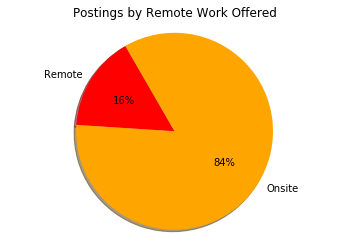

In [354]:
remote = ['Remote', 'Onsite']
remote_jobs = [rmt_df['Remote %'], rmt_df['Onsite %']]
colors = ["red","orange"]

explode = (0,0)

plt.pie(remote_jobs, labels=remote, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle=120)

plt.title('Postings by Remote Work Offered')
plt.axis("equal")
plt.savefig("../Project1/remote_jobs.png")
plt.show()

In [355]:
sr_ct = len(sorted_df[sorted_df['Senior Bucket'].str.contains('Senior')])
lead_ct = len(sorted_df[sorted_df['Senior Bucket'].str.contains('Lead')])
other_ct = len(sorted_df[sorted_df['Senior Bucket'].str.contains('Other')])

sr_prct = ((sr_ct / job_ct) * 100)
lead_prct = ((lead_ct / job_ct) * 100)
other_prct = ((other_ct / job_ct) * 100)

sr_df = pd.DataFrame({'Senior Job %': [sr_prct],'Senior Jobs': [sr_ct],
'Lead Job %': [lead_prct], 'Lead Jobs': [lead_ct], 'Junior/Other Job %': [other_prct],
'Junior/Other Jobs': [other_ct]})

sr_df

,Senior Job %,Senior Jobs,Lead Job %,Lead Jobs,Junior/Other Job %,Junior/Other Jobs
0,32.510288,79,5.761317,14,61.728395,150


C:\Users\matrujillo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


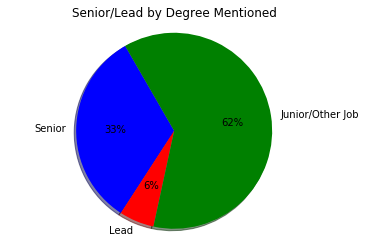

In [356]:
manager = ['Senior', 'Lead', 'Junior/Other Job']
lead_jobs = [sr_df['Senior Job %'], sr_df['Lead Job %'],
               sr_df['Junior/Other Job %']]
colors = ["blue","red","green"]
explode = (0,0,0)

plt.pie(lead_jobs, labels=manager, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle=120)

plt.title('Senior/Lead by Degree Mentioned')
plt.axis("equal")
plt.savefig("../Project1/senior_jobs.png")
plt.show()

In [357]:
# sorted_df = sorted_df.reset_index()
analyst_ct = len(sorted_df[sorted_df['Title Bucket'].str.contains('Analyst')])
eng_ct = len(sorted_df[sorted_df['Title Bucket'].str.contains('Engineer')])
dvlpr_ct = len(sorted_df[sorted_df['Title Bucket'].str.contains('Developer')])
scientist_ct = len(sorted_df[sorted_df['Title Bucket'].str.contains('Scientist')])
staff_ct = len(sorted_df[sorted_df['Title Bucket'].str.contains('Staff')])
principal_ct = len(sorted_df[sorted_df['Title Bucket'].str.contains('Scientist')])
other2_ct = len(sorted_df[sorted_df['Title Bucket'].str.contains('Other')])

analyst_prct = ((analyst_ct / job_ct) * 100)
eng_prct = ((eng_ct / job_ct) * 100)
dvlpr_prct = ((dvlpr_ct / job_ct) * 100)
scientist_prct = ((scientist_ct / job_ct) * 100)
staff_prct = ((staff_ct / job_ct) * 100)
principal_prct = ((principal_ct / job_ct) * 100)
other2_prct = ((other2_ct / job_ct) * 100)
 

title_df = pd.DataFrame({'Analyst Job %': [analyst_prct],'Analyst Jobs': [analyst_ct],
'Engineer Job %': [eng_prct], 'Engineer Jobs': [eng_ct], 'Developer Job %': [dvlpr_prct],
'Developer Jobs': [dvlpr_ct], 'Scientist Job %': [scientist_prct], 'Scientist Jobs': [scientist_ct],
'Staff Jobs': [staff_ct], 'Staff Job %': [staff_prct], 'Principal Jobs': [principal_ct], 'Principal Job %':
[principal_prct], 'Other Jobs': [other2_ct], 'Other Job %': [other2_prct]})

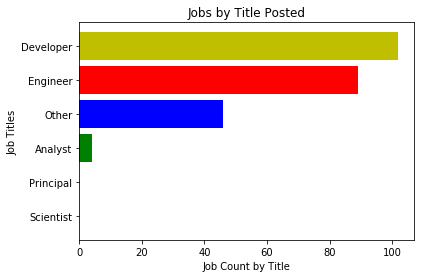

<Figure size 432x288 with 0 Axes>

In [358]:
job_titles = [scientist_ct, principal_ct, analyst_ct, other2_ct,
              eng_ct, dvlpr_ct]
titles = ['Scientist', 'Principal', 'Analyst', 'Other', 'Engineer', 'Developer']
y_pos = np.arange(len(titles))
 
# Create horizontal bars
plt.barh(y_pos, job_titles, color='rygb', zorder=2)
 
# Create names on the y-axis
plt.yticks(y_pos, titles)
plt.xlabel("Job Count by Title")
plt.ylabel("Job Titles")
plt.title('Jobs by Title Posted')
 
# Show graphic
plt.show()
plt.savefig("../Project1/jobs_by_title.png")
titles = ['Engineer', 'Developer', 'Analyst', 'Scientist', 'Staff', 'Principal', 'Other']
job_titles = [eng_ct, dvlpr_ct, other2_ct,
              analyst_ct, staff_ct, principal_ct,
              scientist_ct]

In [359]:
# Degree Preference

master_ct = len(l2[l2['Degree Indication'].str.contains("Master")])
master_prct = (master_ct / job_ct) * 100

bach_ct = len(l2[l2['Degree Indication'].str.contains('Bachelor')])
bach_prct = (bach_ct / job_ct) * 100

boot_ct = len(l2[l2['Degree Indication'].str.contains('Bootcamp')])
boot_prct = (boot_ct / job_ct) * 100

none_ct = len(l2[l2['Degree Indication'].str.contains('None Listed')])
none_prct = (none_ct / job_ct) * 100

degree_df = pd.DataFrame({'Master Job Percent': [master_prct], 'Bachelor Job Percent': [bach_prct],
                          'Bootcamp Job Percent': [boot_prct], 'No Degree Listed Job Percent': [none_prct]})

C:\Users\matrujillo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


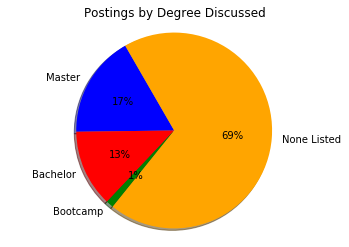

In [360]:
degrees = ['Master', 'Bachelor', 'Bootcamp', 'None Listed']
degree_jobs = [degree_df['Master Job Percent'], degree_df['Bachelor Job Percent'],
               degree_df['Bootcamp Job Percent'], degree_df['No Degree Listed Job Percent']]
colors = ["blue","red","green","orange"]
explode = (0,0,0,0)

plt.pie(degree_jobs, labels=degrees, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle=120)

plt.title('Postings by Degree Discussed')
plt.axis("equal")
plt.savefig("../Project1/jobs_by_degree.png")
plt.show()

In [361]:
# Benefits

child_ct = len(l2[l2['description'].str.contains('Child')])
child2_ct = len(l2[l2['description'].str.contains('child')])
total_child = child_ct + child2_ct
child_prct = (total_child / job_ct) * 100

stock_ct = len(l2[l2['description'].str.contains('Stock')])
stock2_ct = len(l2[l2['description'].str.contains('stock')])
total_stock = stock_ct + stock2_ct
stock_prct = (total_stock / job_ct) * 100

comp_ct = len(l2[l2['description'].str.contains('Competitive salary')])
comp2_ct = len(l2[l2['description'].str.contains('competitive salary')])
comp3_ct = len(l2[l2['description'].str.contains('competitive compensation package')])
total_comp = comp_ct + comp2_ct + comp3_ct
comp_prct = (total_comp / job_ct) * 100

benefit_df = pd.DataFrame({'Offers Stock Options': [total_stock], 'Offers Child Care': [total_child],
                           'Stock Option %': [stock_prct], 'Child Care %': [child_prct],
                          'Competitive Salaries': [total_comp], 'Competitive Salary by %': [comp_prct]})

benefit_df

,Offers Stock Options,Offers Child Care,Stock Option %,Child Care %,Competitive Salaries,Competitive Salary by %
0,9,10,3.703704,4.115226,29,11.934156


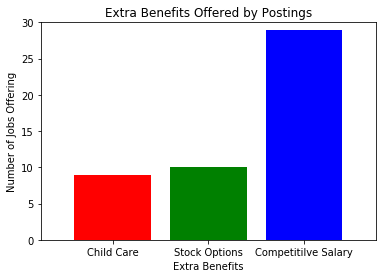

In [372]:
benefits = ['Child Care', 'Stock Options', 'Competitilve Salary']
benefit_cts = [total_stock, total_child,
               total_comp]
x_axis = np.arange(len(benefits))
 
# Create horizontal bars
plt.bar(x_axis, benefit_cts, color='rgb', zorder=2)
 
# Create names on the y-axis
plt.xticks(x_axis, benefits)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xlabel("Extra Benefits")
plt.ylabel("Number of Jobs Offering")
plt.ylim(0, 30)
plt.title("Extra Benefits Offered by Postings")
 
# Show graphic
plt.savefig("../Project1/benefits_by_job.png")
plt.show()

In [363]:
grouped1 = sorted_df.groupby(['Degree Indication', 'Senior Bucket'])

bach_lead = 0
bach_sr = 0
master_lead = 0
master_sr = 0

for d in l2.iterrows():
    if 'Bachelor' in d[1]['Degree Indication'] and 'Lead' in d[1]['Senior Bucket']:
        bach_lead += 1
    elif 'Bachelor' in d[1]['Degree Indication'] and 'Senior' in d[1]['Senior Bucket']:
        bach_sr += 1
    elif 'Master' in d[1]['Degree Indication'] and 'Lead' in d[1]['Senior Bucket']:
        master_lead += 1
    elif 'Master' in d[1]['Degree Indication'] and 'Senior' in d[1]['Senior Bucket']:
        master_sr += 1

In [364]:
grouped2 = sorted_df.groupby(['Degree Indication', 'Title Bucket'])

bach_analyst = 0
bach_dvlpr = 0
bach_eng = 0
master_analyst = 0
master_dvlpr = 0
master_eng = 0

for e in sorted_df.iterrows():
    if 'Bachelor' in e[1]['Degree Indication'] and 'Analyst' in e[1]['Title Bucket']:
        bach_analyst += 1
    elif 'Bachelor' in e[1]['Degree Indication'] and 'Developer' in e[1]['Title Bucket']:
        bach_dvlpr += 1
    elif 'Bachelor' in e[1]['Degree Indication'] and 'Engineer' in e[1]['Title Bucket']:
        bach_eng += 1
    elif 'Master' in e[1]['Degree Indication'] and 'Analyst' in e[1]['Title Bucket']:
        master_analyst += 1
    elif 'Master' in e[1]['Degree Indication'] and 'Developer' in e[1]['Title Bucket']:
        master_dvlpr += 1
    elif 'Master' in e[1]['Degree Indication'] and 'Engineer' in e[1]['Title Bucket']:
        master_eng += 1

In [365]:
# Null hypothesis. If there is no correlation between degree level and working remote, 
# we should see no relationship between remote work jobs and degree level

grouped2 = sorted_df.groupby(['Degree Indication', 'Title Bucket'])

bach_remote = 0
bach_onsite = 0
master_remote = 0
master_onsite = 0
none_remote = 0
none_onsite = 0

for f in sorted_df.iterrows():
    if 'Bachelor' in f[1]['Degree Indication'] and 'Remote' in f[1]['Remote?']:
        bach_remote += 1
    elif 'Bachelor' in f[1]['Degree Indication'] and 'Onsite' in f[1]['Remote?']:
        bach_onsite += 1
    elif 'Master' in f[1]['Degree Indication'] and 'Remote' in f[1]['Remote?']:
        master_remote += 1
    elif 'Master' in f[1]['Degree Indication'] and 'Onsite' in f[1]['Remote?']:
        master_onsite += 1
    elif 'None Listed' in f[1]['Degree Indication'] and 'Remote' in f[1]['Remote?']:
        none_remote += 1
    elif 'None Listed' in f[1]['Degree Indication'] and 'Onsite' in f[1]['Remote?']:
        none_onsite += 1

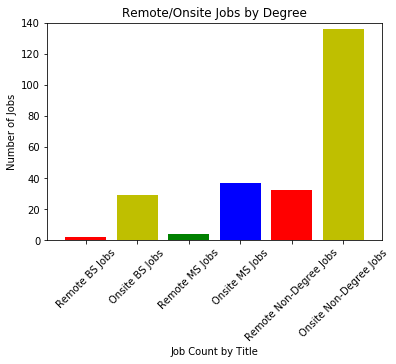

<Figure size 432x288 with 0 Axes>

In [371]:
# Degree breakdown pie chart
rmt_deg = ['Remote BS Jobs', 'Onsite BS Jobs', 'Remote MS Jobs',
           'Onsite MS Jobs', 'Remote Non-Degree Jobs', 'Onsite Non-Degree Jobs']
remote_onsite = [bach_remote, bach_onsite, master_remote, master_onsite,
           none_remote, none_onsite]
x_axis = np.arange(len(rmt_deg))
 
# Create horizontal bars
plt.bar(x_axis, remote_onsite, color='rygb', zorder=2)
 
# Create names on the y-axis
plt.xticks(x_axis, rmt_deg, rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xlabel("Job Count by Title")
plt.ylabel("Number of Jobs")
plt.ylim(0, 140)
plt.title("Remote/Onsite Jobs by Degree")
 
# Show graphic
plt.show()
plt.savefig("../Project1/remote_by_degree.png")

In [367]:
# MICHELLE'S CODE
# Merging clean location data
mt_data_df = pd.DataFrame(l)
mt_data_df.drop(['how_to_apply', 'company_logo', 'company_url', ], axis=1)
clean_location = pd.read_csv(cleancities)
mt_data2 = pd.merge(mt_data_df, clean_location, on='id')
mt_data2.drop(['company_logo', 'company_url', 'how_to_apply', 'location_x', 'url', 'location_y'], axis=1)
mt_df2 = pd.DataFrame(mt_data2)
mt_data2


,company,company_logo,company_url,created_at,description,how_to_apply,id,location_x,title,type,url,city,state_code_or_country,location_y,Remote,City,County,State,Country
0,Datadog,https://jobs.github.com/rails/active_storage/b...,http:,Mon Oct 21 21:12:11 UTC 2019,<p>Have you been writing beautiful web UIs for...,"<p><a href=""https://grnh.se/f0a956961"">https:/...",b3704276-7ed7-4880-8d45-f35052964659,NewYork,Software Engineer- Frontend,Full Time,https://jobs.github.com/positions/b3704276-7ed...,NewYork,None,"New York, New York, United States",NaN,New York,New York,NY,United States
1,Abt Associates,https://jobs.github.com/rails/active_storage/b...,https://www.abtassociates.com/,Mon Oct 21 18:28:48 UTC 2019,<p><strong>Opportunity</strong></p>\n<p>Abt As...,"<p>Apply online here:\n<a href=""https://career...",a71fdb23-3447-4b5f-8fca-db08a774e48b,"Cambridge, MA",Senior Application Developer,Full Time,https://jobs.github.com/positions/a71fdb23-344...,Cambridge,MA,"Cambridge, MA, United States",NaN,Cambridge,Middlesex,MA,United States
2,Sertifi,None,https://corp.sertifi.com/,Mon Oct 21 18:25:41 UTC 2019,<p>Sertifi offers an Agreement Platform built ...,"<p><a href=""https://sertifi.applytojob.com/app...",df2d1d3f-4408-45ca-b586-3f07eb24e0e6,"Chicago, IL",Senior Software Developer,Full Time,https://jobs.github.com/positions/df2d1d3f-440...,Chicago,IL,"Chicago, IL, United States",NaN,Chicago,Cook,IL,United States
3,wrnch,https://jobs.github.com/rails/active_storage/b...,https://wrnch.ai/,Mon Oct 21 14:31:18 UTC 2019,<p>wrnch is one of Canada’s first profitable A...,<p>Please apply via our website -&gt; <a href=...,9dde244a-f5b9-458d-b99b-7cfa19cfa798,Montreal,Senior Software Developer,Full Time,https://jobs.github.com/positions/9dde244a-f5b...,Montreal,None,"Montreal, , Canada",NaN,Montreal,NaN,NaN,Canada
4,AJ Madison,https://jobs.github.com/rails/active_storage/b...,http://www.ajmadison.com/,Mon Oct 21 08:14:49 UTC 2019,<p><strong>Senior Full Stack Engineer</strong>...,<p><strong>Interested?</strong>\nYou can apply...,d81e897e-0bc7-4013-81b9-85c35cb96f57,"Brooklyn, United States",Senior Full Stack Engineer,Full Time,https://jobs.github.com/positions/d81e897e-0bc...,Brooklyn,United States,"Brooklyn, NY, United States",NaN,Brooklyn,Kings,NY,United States
5,Casechek,https://jobs.github.com/rails/active_storage/b...,https://www.casechek.com/,Fri Oct 18 19:00:54 UTC 2019,<p>COMPANY OVERVIEW</p>\n<p>Casechek is the in...,"<p>Email your resume to <a href=""mailto:career...",1e457e27-8d08-4205-bbc8-e5c4ef1f23f6,"Chicago, IL",Senior Software Engineer,Full Time,https://jobs.github.com/positions/1e457e27-8d0...,Chicago,IL,"Chicago, IL, United States",NaN,Chicago,Cook,IL,United States
6,BASF SE,https://jobs.github.com/rails/active_storage/b...,http://on.basf.com/BASFSE,Fri Oct 18 15:07:46 UTC 2019,<p><strong>Einsatzgebiet:</strong> IT / Inform...,"<p><a href=""https://basfse.redirect.your-jobre...",25f23b53-161e-4dcb-9c21-a0131784412d,Ludwigshafen,IT-Architekt_in in der Digitalisierung (m/w/d),Full Time,https://jobs.github.com/positions/25f23b53-161...,Ludwigshafen,None,"Ludwigshafen, , Germany",NaN,Ludwigshafen,NaN,NaN,Germany
7,BASF SE,https://jobs.github.com/rails/active_storage/b...,http://on.basf.com/meinekarriere,Fri Oct 18 13:59:49 UTC 2019,<p><strong>Einsatzgebiet:</strong> IT / Inform...,"<p><a href=""https://basfse.redirect.your-jobre...",db868fae-b183-4585-ba44-edd0f8d5ef20,Ludwigshafen,Softwareentwickler_in in der Digitalisierung (...,Full Time,https://jobs.github.com/positions/db868fae-b18...,Ludwigshafen,None,"Ludwigshafen, , Germany",NaN,Ludwigshafen,NaN,NaN,Germany
8,"Kognition, LLC",https://jobs.github.com/rails/active_storage/b...,https://www.kognition.ai,Fri Oct 18 12:10:31 UTC 2019,<p><strong>Position Summary:</strong></p>\n<p>...,"<p>Email your resume to <a href=""mailto:jobs@k...",d4383e28-fc94-4121-9140-60b47c6b3437,"Philadelphia, PA",Senior UI Engineer,Full Time,https://jobs.github.com/positions/d4383e28-fc9...,Philadel

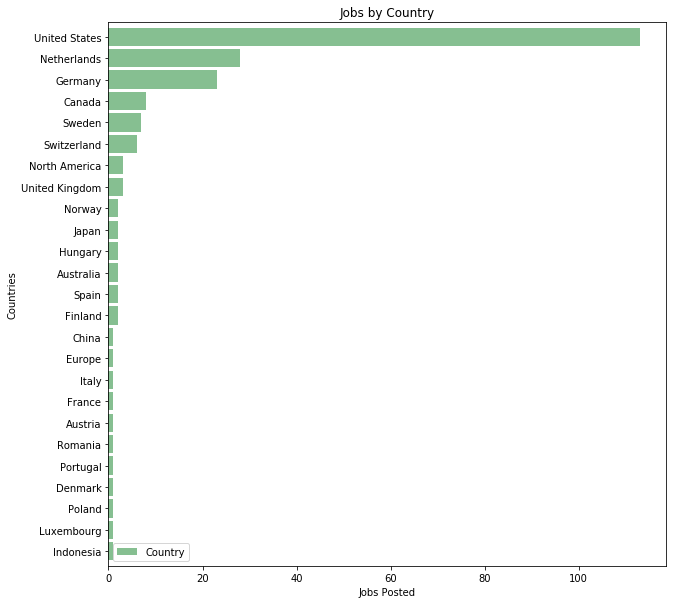

In [368]:
# Created horizontal bar graph for countries
country = mt_data2['Country'].value_counts()
country_df = pd.DataFrame(country)
country_df.plot(kind='barh', figsize=(10,10), color='#86bf91', zorder=2, width=0.85).invert_yaxis()
plt.xlabel("Jobs Posted")
plt.ylabel("Countries")
plt.title("Jobs by Country")
plt.savefig("../Project1/country_hbar.png")

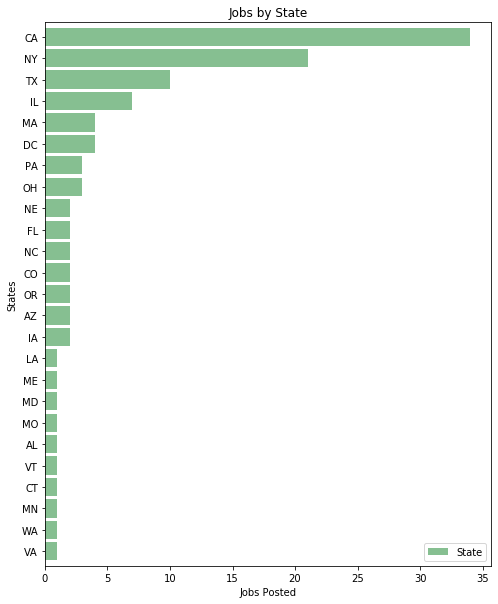

In [369]:
# Created horizontal bar graph for states
state = mt_data2['State'].value_counts()
state_df = pd.DataFrame(state)
state_df.plot(kind='barh', figsize=(8,10), color='#86bf91', zorder=2, width=0.85).invert_yaxis()
plt.xlabel("Jobs Posted")
plt.ylabel("States")
plt.title("Jobs by State")
plt.savefig("../Project1/state_hbar.png")

In [370]:
# Analysis on age of job posts

mt_data2['Today'] = '10/22/19'
mt_data2.rename(columns={'created_at':'Entered'}, inplace=True)
time_df = pd.DataFrame(mt_data2, columns=['Entered', 'Today'])

time_df['Entered Month'] = time_df['Entered'].str[4:7]
time_df['Entered Day'] = time_df['Entered'].str[8:10]
time_df['Entered Year'] = time_df['Entered'].str[-2:]

time_df['Entered Month']=time_df['Entered Month'].replace({'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06',
                                                          'Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'})

time_df['Entered On'] = time_df.pop('Entered Month')+'/'+time_df.pop('Entered Day')+'/'+time_df.pop('Entered Year')

#time_df['Age'] = time_df['Today']-time_df['Entered On']
time_df['Entered On']=pd.to_datetime(time_df['Entered On'])
time_df['Today']=pd.to_datetime(time_df['Today'])
time_df['Age'] = (time_df['Today']-time_df['Entered On']).dt.days
min = time_df['Age'].min()
max = time_df['Age'].max()
median = time_df['Age'].median()
mode = time_df['Age'].mode()
mean = time_df['Age'].mean()

time_df.describe().round()

,Age
count,243.0
mean,165.0
std,165.0
min,1.0
25%,14.0
50%,28.0
75%,348.0
max,366.0
